In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import roc_auc_score,roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('globalpower.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Key attributes of the database

The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export


`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

`commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

`owner` (text): majority shareholder of the power plant, generally in Romanized form


`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Analysis: 

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# PRIMARY fuel is classification and Capacity_mw is regression


In [4]:
#to check the shape of the data
print('the number of rows and columns are : ',df.shape)

the number of rows and columns are :  (908, 25)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

# A lot of data contains object type data

In [6]:
#to check for nan values in the dataset
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

# check value counts of all object type data

In [7]:
df['gppd_idnr'].value_counts()

IND0000008    1
WRI1026087    1
IND0000125    1
WRI1026064    1
IND0000322    1
             ..
WRI1026778    1
WRI1020245    1
WRI1026175    1
IND0000305    1
IND0000398    1
Name: gppd_idnr, Length: 908, dtype: int64

In [8]:
df['name'].value_counts()

U.B.D.C. ST.-I& II         1
BHAWANI KATTALAI -III      1
VIKRAM CEMENT              1
LOWER LAGYAP               1
RIHAND_Hydro               1
                          ..
RAJASHREE CEMENT           1
Dugar Solar Power Plant    1
JAYKAYPURAM PLANT          1
Sonu Wind Farm             1
RAJPURA TPP                1
Name: name, Length: 908, dtype: int64

In [9]:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [10]:
df['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [11]:
df['owner'].value_counts()

Sterling Agro Industries ltd.                  4
Acc Acc ltd                                    4
Jk Cement ltd                                  4
Government of India                            3
Jaypee Ltd jccl)                               3
                                              ..
Welspun Solar AP Private Limited               1
Vasantdada Ssk ltd                             1
Lanco Solar Energy Private Limited             1
Finehope Allied Engineering Private Limited    1
Clover Solar Private Limited (CSPL)            1
Name: owner, Length: 280, dtype: int64

In [12]:
df['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Hothur Pvt ltd                                 1
Godavari Mills ltd                             1
Bharat Refinery ltd                            1
Sahakarmaharshi Bhausaheb thor                 1
Lingandwi                                      1
Name: source, Length: 191, dtype: int64

In [13]:
df['url'].value_counts()

http://www.cea.nic.in/                                                                                                                                       520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                                7
http://www.ntpc.co.in                                                                                                                                          6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                               5
http://energy.rajasthan.gov.in/content/dam/raj/energy/common/Details%20of%20commissioned%20Solar%20Projects%20.pdf                                             4
                                                                                                                                                            ... 
http://www.gangakhedicpp.com/     

In [14]:
df['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

In [15]:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
#replacimg the nan values present in df['geolocation_source'] with the most frequent value
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode().iloc[0])

In [17]:
df['geolocation_source'].isnull().sum()

0

In [18]:
#checking the value counts after removing nan values
df['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

# droping the unnecessary columns after conclusion from the above analysis

# url, owner, commissioning_year, source: (logical reasoning) a model should not conclude fuel type or capacity mw from owner name or url or the year it started.
    
# latitude, longitude: contains almost same value over the whole dataset  

# year_of_capacity_data, generation_data_source: it contains only 1 value and rest is null which wont help is predicting data

# other_fuel1: almost whole column is empty

# country and country long: the whole dataset contains same value

# name, gppd_idnr as it only acts as an identity for the plants and all values are unique

# wepp_id,estimated_generation_gwh, other_fuel2, other_fuel3: almost whole column is empty so they dont provide any data hence we can drop it

In [19]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [20]:
df=df.drop(['country','country_long','name','gppd_idnr','wepp_id','other_fuel2','other_fuel3','other_fuel1','url','owner',
           'longitude','latitude','estimated_generation_gwh','year_of_capacity_data','generation_data_source',
           'commissioning_year','source'],axis=1)

In [21]:
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,Coal,WRI,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,Solar,Industry About,NaN,NaN,NaN,NaN,NaN
905,25.5,Wind,WRI,NaN,NaN,NaN,NaN,NaN
906,80.0,Coal,WRI,NaN,NaN,NaN,NaN,NaN


In [22]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
geolocation_source       0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [23]:
df.dtypes

capacity_mw            float64
primary_fuel            object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

# we need to fill in the missing  nan values of float dtype with mean

In [24]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())

In [25]:
df.isnull().sum()

capacity_mw              0
primary_fuel             0
geolocation_source       0
generation_gwh_2013      0
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [26]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [27]:
df.isnull().sum()

capacity_mw            0
primary_fuel           0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# all the nan values are filled

In [28]:
df

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,Coal,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,Wind,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,Gas,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,Coal,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,Coal,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,Solar,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,Wind,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,Coal,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


# EDA AND VISUALIZATION

In [29]:
df.describe()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


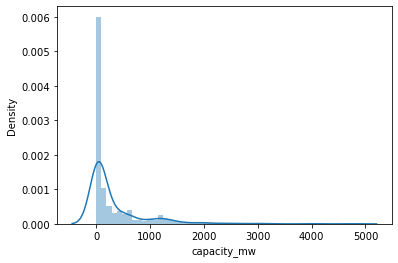

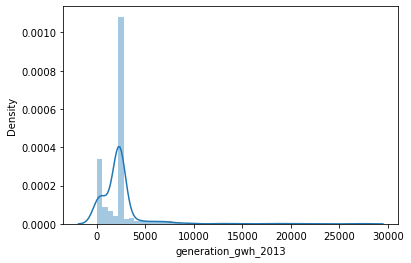

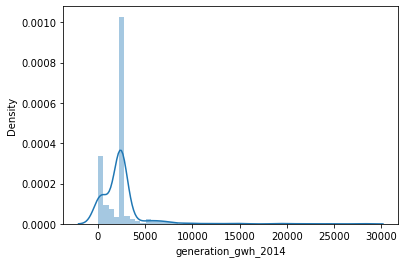

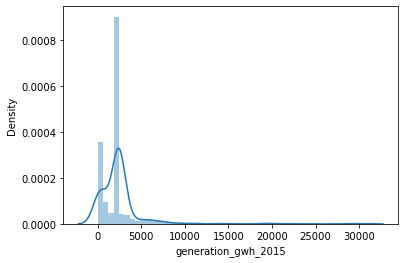

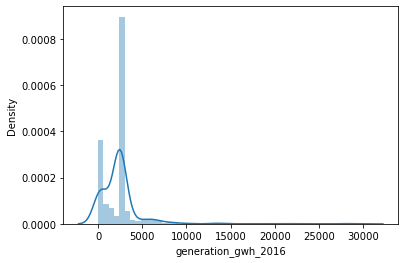

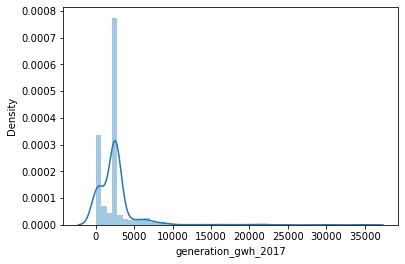

In [30]:
#plotting distplot to check skewness present in the data
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

# we can see there is some skewness present in all the columns which we see above

# checking some graphs with refrence to primary_fuel

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

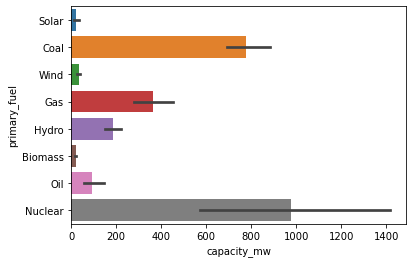

In [31]:
sns.barplot(x='capacity_mw',y='primary_fuel',data=df)

# we can see nuclear takes more capacity compared to other fuels

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

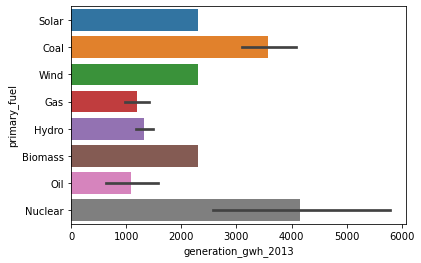

In [32]:
sns.barplot(x='generation_gwh_2013',y='primary_fuel',data=df)

# nuclear plant have generated highest amount of electricity followed by coal in the year 2013

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

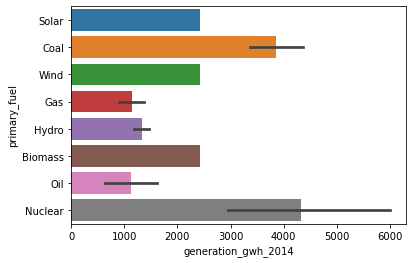

In [33]:
sns.barplot(x='generation_gwh_2014',y='primary_fuel',data=df)

# nuclear plant have generated highest amount of electricity followed by coal in the year 2014

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

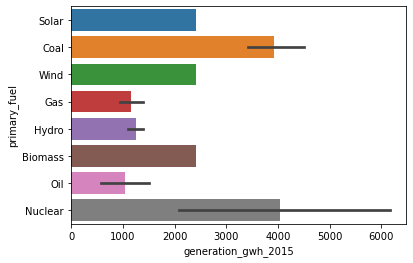

In [34]:
sns.barplot(x='generation_gwh_2015',y='primary_fuel',data=df)

# nuclear plant and coal have generated similar amount of energy in the year 2015

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

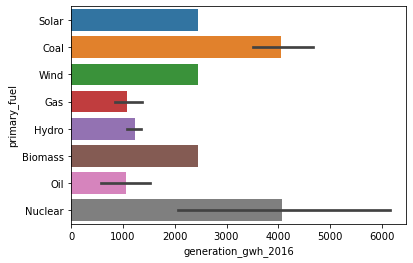

In [35]:
sns.barplot(x='generation_gwh_2016',y='primary_fuel',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

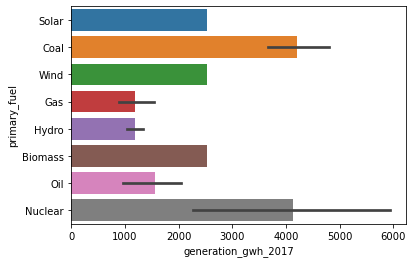

In [36]:
sns.barplot(x='generation_gwh_2017',y='primary_fuel',data=df)

# we can see that 2015,2016 and 2017 results are similar where nuclear and coal are producing highest amount of energy compared to other fuels

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

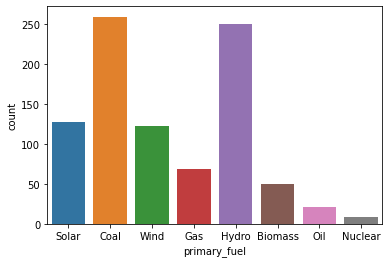

In [37]:
sns.countplot(df['primary_fuel'])

# the data is surely imbalacend will balance the data but first we need to convert the categorical data to numeric data using label encoder

In [38]:
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [39]:
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [40]:
df.dtypes

capacity_mw            float64
primary_fuel             int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [41]:
df.dtypes

capacity_mw            float64
primary_fuel             int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

# so all the object type data is coverted into numerical

In [42]:
df['geolocation_source'].value_counts()

2    785
0    119
1      4
Name: geolocation_source, dtype: int64

# now we check if there are any outliers present

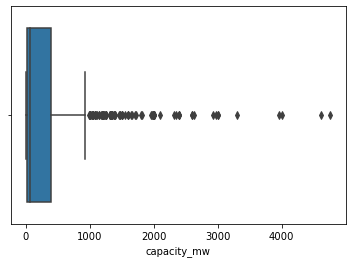

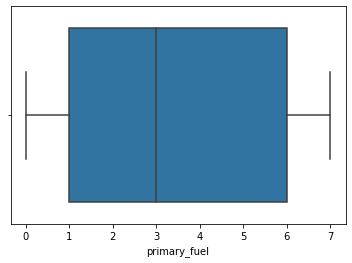

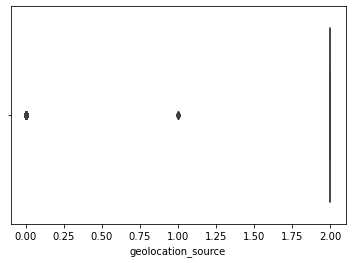

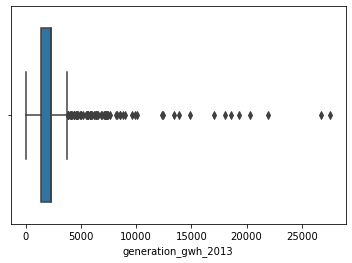

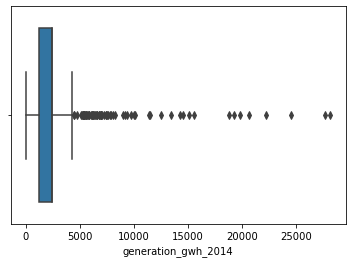

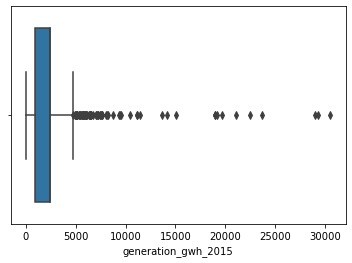

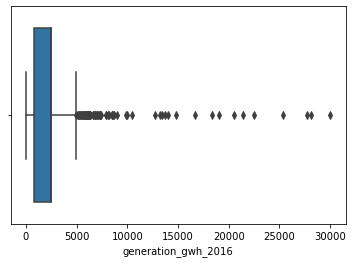

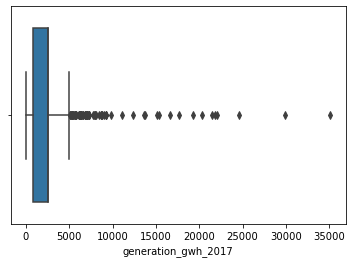

In [43]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# we can see that there are outliers present in all the columns except primary fuel

# removing the outliers

In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [45]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 210,
       210, 210, 210, 210, 210, 309, 309, 309, 309, 309, 309, 364, 365,
       365, 365, 365, 365, 365, 376, 483, 494, 494, 494, 494, 494, 494,
       495, 495, 495, 495, 495, 495, 533, 649, 649, 649, 649, 649, 649,
       658, 658, 658, 658, 658, 658, 696, 696, 696, 696, 696, 722, 722,
       722, 722, 725, 725, 725, 725, 725, 727, 727, 727, 727, 727, 727,
       787, 787, 787, 787, 787, 787, 789, 809, 809, 809, 809, 809, 881,
       881, 881, 881, 881, 881], dtype=int64), array([0, 5, 6, 7, 0, 3, 4, 5, 6, 7, 3, 4, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5,
       6, 7, 0, 0, 3, 4, 5, 6, 7, 0, 0, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6,
       7, 3, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 4, 5, 6, 7, 3, 4, 5,
       6, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 0, 4, 5,
       6, 7, 0, 3, 4, 5, 6, 7], dtype=int64))


In [46]:
df1=df[(z<3).all(axis=1)]
df1

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [47]:
df.shape

(908, 8)

In [48]:
df1.shape

(886, 8)

In [49]:
data_loss=(908-886)/908*100
data_loss

2.4229074889867843

# data loss is only 2 % so we can move forward 

# CLASSIFICATION MODEL

# we do the classifiication model where we predict the primary fuel for the data

balancing the dataset 

In [50]:
dfx=df1.drop(['primary_fuel'],axis=1)
dfy=df1['primary_fuel']

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

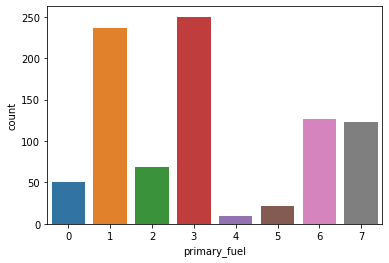

In [51]:
sns.countplot(dfy)

In [52]:
#to balance the data 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [53]:
y.value_counts()

7    250
6    250
5    250
4    250
3    250
2    250
1    250
0    250
Name: primary_fuel, dtype: int64

In [54]:
y.shape

(2000,)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

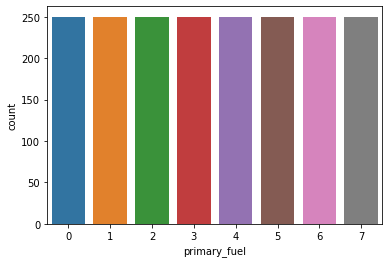

In [55]:
sns.countplot(y)

In [56]:
x.shape

(2000, 7)

# now the data is completely balanced

# removing skewness

In [57]:
x.columns

Index(['capacity_mw', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [58]:
from sklearn.preprocessing import power_transform
x[['capacity_mw', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']]=power_transform(x[['capacity_mw', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']],method='yeo-johnson')
x

,capacity_mw,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.781172,1,0.289740,0.298028,0.354355,0.363744,0.321864
1,0.203643,2,0.289740,0.298028,0.354355,0.363744,0.321864
2,-0.309195,2,0.289740,0.298028,0.354355,0.363744,0.321864
3,0.380559,2,-1.032933,-1.050691,-0.698353,-0.608042,-0.870210
4,1.750045,2,-0.136325,0.643570,1.855729,1.822580,1.450650
...,...,...,...,...,...,...,...
1995,0.043353,2,0.289740,0.298028,0.354355,0.363744,0.321864
1996,-0.590672,2,0.289740,0.298028,0.354355,0.363744,0.321864
1997,-0.316090,2,0.289740,0.298028,0.354355,0.363744,0.321864
1998,-0.615894,2,0.289740,0.298028,0.354355,0.363744,0.321864


# we are done with EDA, cleansing and Visualization and now we can move forward

# Feature Scaling

In [59]:
#scaling all the non categorical data 
sc=StandardScaler()
x[['capacity_mw', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']]=sc.fit_transform(x[['capacity_mw', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']])

In [60]:
x

,capacity_mw,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.781172,1,0.289740,0.298028,0.354355,0.363744,0.321864
1,0.203643,2,0.289740,0.298028,0.354355,0.363744,0.321864
2,-0.309195,2,0.289740,0.298028,0.354355,0.363744,0.321864
3,0.380559,2,-1.032933,-1.050691,-0.698353,-0.608042,-0.870210
4,1.750045,2,-0.136325,0.643570,1.855729,1.822580,1.450650
...,...,...,...,...,...,...,...
1995,0.043353,2,0.289740,0.298028,0.354355,0.363744,0.321864
1996,-0.590672,2,0.289740,0.298028,0.354355,0.363744,0.321864
1997,-0.316090,2,0.289740,0.298028,0.354355,0.363744,0.321864
1998,-0.615894,2,0.289740,0.298028,0.354355,0.363744,0.321864


# classification model building

In [61]:
lg=LogisticRegression()

for i in range(10,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(xtrain,ytrain)
    pred_train=lg.predict(xtrain)
    pred_test=lg.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state :- ',i)
        print('training score is :',accuracy_score(ytrain,pred_train)*100)
        print('testing score is :',accuracy_score(ytest,pred_test)*100)
        print('\n')

At random state :-  152
training score is : 50.6875
testing score is : 50.74999999999999




In [62]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()
rd=RidgeClassifier()
sgdc=SGDClassifier()

model=[lg,dtc,knn,rfc,svc,abc,gb,rd,sgdc]

In [63]:
#testing the models and checking their accuracy, cross_val_score as well as roc_auc-score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=82)
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred=m.predict(xtest)
    print('Accuracy score of ',m,'is :')
    print(accuracy_score(ytest,pred))
    score=cross_val_score(m,x,y,cv=5).mean()    
    print('cross_val score :',score)
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))

Accuracy score of  LogisticRegression() is :
0.525
cross_val score : 0.5035000000000001
[[39  0  0  0  0  0  0  7]
 [ 3 11  6  1 23  2  0  8]
 [ 2  7 31  2  4  2  0  6]
 [12  1  9  6  0 18  0  0]
 [ 0  7  0  1 40  0  0  0]
 [12  3  6  4  0 23  0  4]
 [ 1  0  0  0  0  0 44  1]
 [29  9  0  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.40      0.85      0.54        46
           1       0.29      0.20      0.24        54
           2       0.60      0.57      0.58        54
           3       0.43      0.13      0.20        46
           4       0.60      0.83      0.70        48
           5       0.51      0.44      0.47        52
           6       1.00      0.96      0.98        46
           7       0.38      0.30      0.33        54

    accuracy                           0.53       400
   macro avg       0.53      0.54      0.51       400
weighted avg       0.52      0.53      0.50       400

Accuracy score of  DecisionTreeClassifier() 

# we checked the accuracy score and cross_val score after testing 

# we found out that kneighbors, random forest and gradient boosting classifier are the best working models with accuracy of more than 75%

# we will try to hyper tune these models

# hypertuning 

kneighbors classifier

In [394]:
parameters={'n_neighbors':[1,3,5,7,10],'algorithm':['auto','brute','kd_tree']}
clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

In [64]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto')
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)
print('accuracy :',accuracy_score(ytest,pred))

accuracy : 0.7225


# after using hypertuning we got the accuracy of 72%

# Randomforest classifier

In [396]:
parameters={"n_estimators":[10,100,500],'criterion':['gini', 'entropy']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=181)
rfr=RandomForestClassifier(n_estimators=500,criterion='gini')
rfr.fit(xtrain,ytrain)
pred=rfr.predict(xtest)
rfr.score(xtrain,ytrain)

0.960625

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=82)
rfr=RandomForestClassifier(n_estimators=500,criterion='gini')
rfr.fit(x,y)
pred=rfr.predict(x)
print('accuracy : ',accuracy_score(y,pred))

accuracy :  0.9555


# with random forest we got the accuracy of 96% 

# Gradient boosting classifier

In [ ]:
parameters={'n_estimators':[10,100,500],'criterion':['friedman_mse', 'mse', 'mae'],'loss':['deviance','exponential']}
clf=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5,scoring='roc_auc')
clf.fit(x,y)
clf.best_params_

In [68]:
gb=GradientBoostingClassifier(criterion='friedman_mse',loss= 'deviance', n_estimators= 100)
gb.fit(xtrain,ytrain)
pred=gb.predict(xtest)
print('accuracy : ',accuracy_score(ytest,pred))

accuracy :  0.69


# Gradient boosting gave us the accuracy of close to 69% 

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=82)
rfr=RandomForestClassifier(n_estimators=500,criterion='gini')
rfr.fit(x,y)
pred=rfr.predict(x)
print('accuracy : ',accuracy_score(y,pred))

accuracy :  0.9555


# from the above analysis of hypertuning we can conclude that Random Forest classifier is the best peroforming model with 96% accuracy

# checking the predicted data

In [77]:
pred=rfr.predict(x)

In [78]:
x['pred']=pred

<AxesSubplot:xlabel='pred', ylabel='Density'>

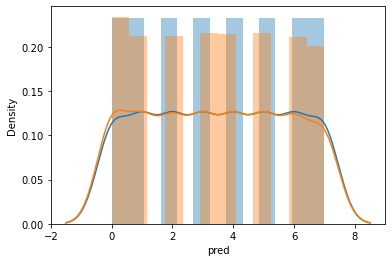

In [79]:
sns.distplot(y)
plt.show
sns.distplot(x['pred'])

# we can see that the predicted values and the actual values are pretty much similar to each other

# saving random forest model for classification

In [80]:
joblib.dump(rfr,'global_class.obj')

['global_class.obj']

# now

# Regression Model

In [81]:
df1

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...
903,1600.0,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,6,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [82]:
x=df1.drop(['capacity_mw'],axis=1)
y=df1['capacity_mw']

In [83]:
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,2,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...
903,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,6,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,7,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,1,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [84]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 886, dtype: float64

# removing skewness

In [85]:
x.columns

Index(['primary_fuel', 'geolocation_source', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

In [86]:
#using power transform and method yeo johnson
x[['generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']]=power_transform(x[['generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']],method='yeo-johnson')
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6,1,0.338455,0.361376,0.386948,0.390077,0.391907
1,1,2,0.338455,0.361376,0.386948,0.390077,0.391907
2,7,2,0.338455,0.361376,0.386948,0.390077,0.391907
3,2,2,-1.024977,-1.006484,-0.692094,-0.643899,-0.858619
4,1,2,-0.101136,0.706068,1.924788,1.958351,1.583985
...,...,...,...,...,...,...,...
903,1,2,0.338455,0.361376,-2.079266,-1.385623,-0.674176
904,6,0,0.338455,0.361376,0.386948,0.390077,0.391907
905,7,2,0.338455,0.361376,0.386948,0.390077,0.391907
906,1,2,0.338455,0.361376,0.386948,0.390077,0.391907


# feature scaling

# scaling the noncategorical data

In [87]:
sc=StandardScaler()
x[['generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']]=sc.fit_transform(x[['generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']])

In [88]:
x

,primary_fuel,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,6,1,0.338455,0.361376,0.386948,0.390077,0.391907
1,1,2,0.338455,0.361376,0.386948,0.390077,0.391907
2,7,2,0.338455,0.361376,0.386948,0.390077,0.391907
3,2,2,-1.024977,-1.006484,-0.692094,-0.643899,-0.858619
4,1,2,-0.101136,0.706068,1.924788,1.958351,1.583985
...,...,...,...,...,...,...,...
903,1,2,0.338455,0.361376,-2.079266,-1.385623,-0.674176
904,6,0,0.338455,0.361376,0.386948,0.390077,0.391907
905,7,2,0.338455,0.361376,0.386948,0.390077,0.391907
906,1,2,0.338455,0.361376,0.386948,0.390077,0.391907


# check multicollinearity

In [89]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,1.793761,primary_fuel
1,1.797157,geolocation_source
2,7.030167,generation_gwh_2013
3,8.785815,generation_gwh_2014
4,8.090075,generation_gwh_2015
5,10.984506,generation_gwh_2016
6,5.586464,generation_gwh_2017


# PCA

In [90]:
for i in range(2,7):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.9062292112893481
3 0.9412002174710188
4 0.9731183435635525
5 0.9876607838267096
6 0.9947772682136826


# we choose n_components as 5 with 98% data retention

In [91]:
pca=PCA(n_components=5)
x=pca.fit_transform(x)

# Building regression model

In [92]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor()]

In [94]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 45,test_size=0.20)
    score=cross_val_score(i,x_train,y_train,cv=5,scoring='r2').mean()
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print(i)
    print('mean cross_val_score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('\n')

GradientBoostingRegressor()
mean cross_val_score 0.7293193837097592
r2 0.8102333771381482
diff 0.08091399342838901


LinearRegression()
mean cross_val_score 0.29531288822247176
r2 0.3590179717059242
diff 0.06370508348345244


Ridge()
mean cross_val_score 0.2953788492741537
r2 0.35903939533304674
diff 0.06366054605889304


BayesianRidge()
mean cross_val_score 0.2952708673312768
r2 0.35893399324796027
diff 0.0636631259166835


SGDRegressor()
mean cross_val_score 0.2924818541844598
r2 0.36153346435171085
diff 0.06905161016725103


SVR()
mean cross_val_score -0.1829816189369274
r2 -0.230986788671395
diff 0.048005169734467584


AdaBoostRegressor()
mean cross_val_score 0.6255504630854241
r2 0.7052707255763524
diff 0.07972026249092834


KNeighborsRegressor()
mean cross_val_score 0.7357171475723276
r2 0.8180949169416957
diff 0.08237776936936803


RandomForestRegressor()
mean cross_val_score 0.7599662984468015
r2 0.8175516127846857
diff 0.057585314337884164


BaggingRegressor()
mean cross_val_s

# After testing all the models for regression we saw that our best performing models are :-

# random forest gave us close to 80% r2_score and with the least difference

# kneighbors gave us close to 76% accuracy 

# Bagging Regressor with  close to 75% accuracy


# now we will hyper tune the parameters

# HYPERTUNING 

# kneighbors

In [447]:
parameters={'n_neighbors':[1,3,5,7,10],'algorithm':['auto','brute','kd_tree']}
clf = GridSearchCV(KNeighborsRegressor(), parameters, cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'algorithm': 'brute', 'n_neighbors': 7}

In [449]:
knr=KNeighborsRegressor(n_neighbors=7,algorithm='brute')
knr.fit(xtrain,ytrain)
pred=knr.predict(xtest)
print('r2_score :',r2_score(ytest,pred))

r2_score : 0.4459797925448855


# random forest classifier

In [ ]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae']}
clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.8266351542761377


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=500,criterion='mse',max_features='log2')
rfr.fit(x,y)
y_pred=rfr.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.9571214077525888


# bagging regressor

In [455]:
parameters={'n_estimators':[10,500],'max_features':[0.001,0.01,0.1,1.0]}
clf=GridSearchCV(BaggingRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'max_features': 1.0, 'n_estimators': 500}

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x_train,y_train)
y_pred=br.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)

r2_score : 0.8169417512116788


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 76,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x,y)
y_pred=br.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.9553322364998514


# we choose to save Random forest regressor as it shows us the best r2_score 

In [103]:
joblib.dump(rfr,'global_reg.obj')

['global_reg.obj']

In [112]:
pred=rfr.predict(x)

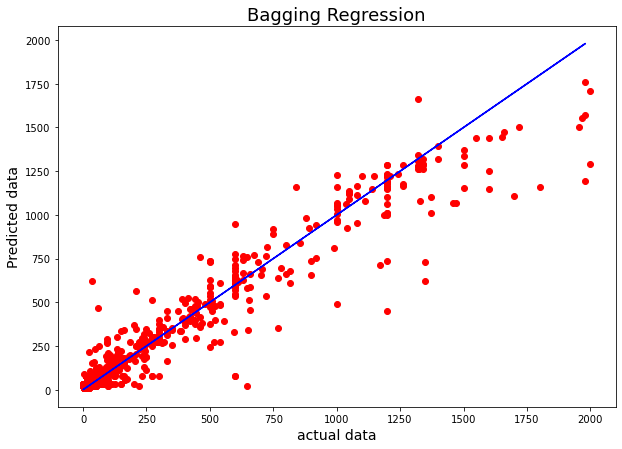

In [113]:
plt.figure(figsize=(10,7))
plt.scatter(x=y, y=pred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Bagging Regression',fontsize=18)
plt.show()